<a href="https://www.kaggle.com/code/luochenxun/learn-1?scriptVersionId=123970010" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 这是我的第一个线性回归实验

## 第一阶段：数据的收集与预处理

### 1. 先收集数据，建立数据源
### 2. 然后导入数据，进行可视化分析
这里用 pandas 将 csv 数据读入，转成 dataframe 结构。`df.head()` 打印表结构。

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df_ads = pd.read_csv('/kaggle/input/learn-ads-amount/advertising.csv')
df_ads.head()

,wechat,weibo,others,sales
0,304.4,93.6,294.4,9.7
1,1011.9,34.4,398.4,16.7
2,1091.1,32.8,295.2,17.3
3,85.5,173.6,403.2,7.0
4,1047.0,302.4,553.6,22.1


### 3. 数据的相关性分析(correlation analysis)

相关分析后我们 可以通过相关性系数了解数据集中任意一对变量（a，b）之间的相关性。

`相关性系数`是一个-1～1的值，正值表示正相关，负值表示负相 关。数值越大，相关性越强。
> - 如果a和b的相关性系数是1，则a和b总是相等的。
> - 如果a和b的相关性系数是0.9，则b会显著地随着a的变化而变化，而且变化的趋势保持一致。
> - 如果a和b的相关性系数是0.3，则说明两者之间并没有什么明显的联系。

这里使用的 `Seaborn` 是统计学可视化工具库，这里使用其热力图功能`sns.heatmap`，展示数据的相关性`df_ads.corr()`，可对所有特征和标签两两显示其相关性（用热力图表示）。
`matplotlib`是可视化图形库，具体的图形展示要使用此库 `plt.show()` 展示。

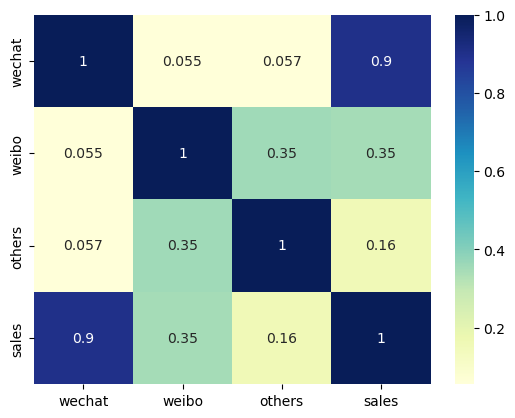

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns   # Seaborn – 统计学数据可视化工具库
# 对所有的标签和特征两两显示其相关性的热力图(heatmap)
sns.heatmap(df_ads.corr(), cmap='YlGnBu', annot=True)
plt.show()

在上面的实例中，我们主要看最后一行，微信、微博和others的广告投入与 sales 销售额的相关性。可以看出，微信与之相关性是 0.9，是很高的；而微博与之相关性才 0.35，说明微博广告投入的收入效果不明显。

### 4. 数据的散点图分析

相关性可以看自变量与因变量之间是否相关，相关度怎样。而散点图可以看两个变量间相关的趋势是如何。
使用 `sns.pairplot()`方法，指定对比的 x 轴自变量(特征)，与 y 轴因变量(标签)。

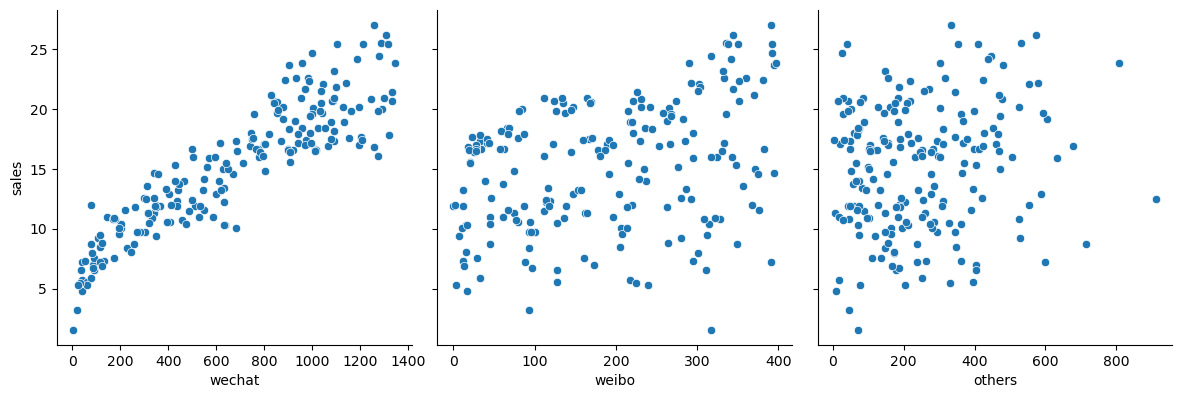

In [3]:
# 显示销量和各种广告投放量的散点图
sns.pairplot(df_ads, 
             x_vars = ['wechat', 'weibo', 'others'],
             y_vars = 'sales',
             height =4, aspect=1, kind='scatter')
plt.show()

从上面例子可看出，微信金额投入超大，收入越可观。而其它两项很难看出趋势。

### 5. 数据集的清洗与规范化

在对数据有大致分析与印象后，就要开始精细化分析了，这之前先要对数据进行清洗与规范化。

- **清洗**：将不必要的数据清洗出去；将不符要求的数据转成符合要求的标准数据；
- **规范化**：将数据格式化成系统可直接处理的数据结构；

对于回归问题的数值类型数据集，机器学习模型 所读入的规范格式应该是2D张量，也就是矩阵，其形状为`(样本数，标签数）`。其中的**行是数据，而其中的列是特征**。

所以此例中，我们要将1D张量(向量)的特征值（微信广告投入费用）转成2D张量（也就是一个矩阵，只不过此矩阵只有一列，就是“微信广告投入费”，每一行是一维数据）。对于`标签`--销售额来说，也是一样的，要进行一个1D->2D的转换。这里使用了 `numpy.reshape()`方法。

In [4]:
### --- 清洗
# 构建特征集，只含有微信广告一个特征
X = np.array(df_ads.wechat)
# 构建标签集
y = np.array(df_ads.sales)

# x.ndim = 1，因为它是一个向量（1d张量）
print("张量X的阶：", X.ndim)
# shape 打印：(200,)， 表示这是一个 1D 200 维向量(shape 打印的是每一阶的维度)
print("张量X的形状：", X.shape)
print("张量X的内容：", X[:10])

### --- 规范化
# 通过reshape函数把向量转换为矩阵，len函数返回样本个数
X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)

# 其 shape 变成了 2D 张量 (200, 1)，
print("规范化后，张量X的形状：", X.shape)
print("规范化后，张量X的内容：", X[:10])

张量X的阶： 1
张量X的形状： (200,)
张量X的内容： [ 304.4 1011.9 1091.1   85.5 1047.   940.9 1277.2   38.2  342.6  347.6]
规范化后，张量X的形状： (200, 1)
规范化后，张量X的内容： [[ 304.4]
 [1011.9]
 [1091.1]
 [  85.5]
 [1047. ]
 [ 940.9]
 [1277.2]
 [  38.2]
 [ 342.6]
 [ 347.6]]


### 6. 拆分数据集为训练集、测试集、验证集

在开始建模之前，还需要把数据集拆分为两个部分：**训练集**和**测试集**。
在普通的机器学习项目中，至少要包含这两个数据集，一个用于训练机器，确定模型，另一个用于测试模型的准确性。
不仅如此，往往还需要一个**验证集**，以在最终测试之前增加验证环节。

这里直接调用机器学习库 `sklearn` 的 `train_test_split()` 方法，将`特征`与`标签`按`8:2`比例拆分成训练集和测试集。

In [5]:
# 将数据集进行80%训练集和20%测试集的分割：
from sklearn.model_selection import train_test_split

# random_state参数，则用于数据集拆分过程的随机化设定。
# 如果指定了一个整数，那么这个数叫作随机化种子，每次设定固定的种子能够保证得到同样的训练集和测试集，否则进行随机分割。
# 方法执行完后，将数据集分两块：训练集和测试集
# X_train, X_test: 特征的训练集和测试集
# y_train, y_test: 标签的训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 7. 数据归一化

对数据进行归一化。归一化是按比例的线性缩放。数据归一 化之后，数据分布不变，但是都落入一个小的特定区间，比如0～1或者-1～+1。

通过Sklearn库中preprocessing（数据预处理）工具中的`MinMaxScaler`可以实现数据的归一化。(当然，你也可以自己通过 max-min 得标准区间后自己计算得到)。





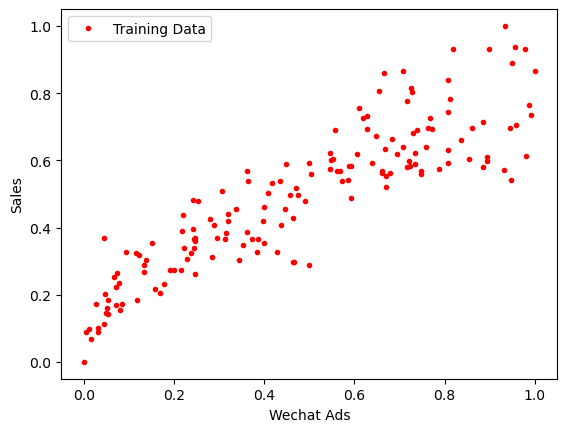

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=[0,1]) #实例化
X_train = scaler.fit_transform(X_train)
y_train = scaler.fit_transform(y_train)

plt.plot(X_train, y_train, 'r.', label='Training Data')
plt.xlabel('Wechat Ads')
plt.ylabel('Sales')
plt.legend()  # 显示图例
plt.show()

## 第二阶段：选择机器学习模型

1. 确定回归模型
2. 假设函数 -- 确定 `h(x)`
3. 损失函数 -- 确定 `w`, `b`

从上面的归一划后的表可以看出，这个模型基本符合一个`一元线性函数`。

确定以线性函数作为机器学习模型之后，我们接着介绍假设函数的概念。

先来看一个与线性函数稍有差别的方程式： 
```
y' = wx+b 
```
也可以写成： 
```
h(x) = wx+b
```

这里, `b` 称作函数的偏置，`w` 为函数的权重.

机器学习的主要过程，就是找到 `b`与`w` 的过程。

这里就需要引入`损失（loss）`这个概念。

> 损失，是对糟糕预测的惩罚。损失也就是误差，也称为成本 （cost）或代价。


**损失函数（loss function)** -- `L(w，b)` 就是用来计算平均损失的。也可称之为`代价函数`、`成本函数（cost function）`


一般来说，选择最常用的损失函数就可以达到评估参数的目的。

比如常用的, 用于回归的损失函数：
- `均方误差（Mean Square Error，MSE）函数`，也叫平方损失或 **L2损失函数**。
- `平均绝对误差（Mean Absolute Error，MAE）函数`，也叫 **L1损失函数**。
- `平均偏差误差（mean bias error）函数`。


用于分类的损失函数：

- `交叉熵损失（cross-entropy loss）函数`
- `多分类SVM损失（hinge loss）函数`

比如当前例子中，我们使用 `MSE` 来作为我们模型的损失函数。




In [7]:
# 定义误差函数 MSE
def loss_function(X, y, weight, bias):
    y_hat = weight * X + bias
    loss = y_hat - y
    cost = np.sum(loss**2)
    return cost

# 测试误差函数
print ("当权重5，偏置3时，损失为：", 
loss_function(X_train, y_train, weight=5, bias=3))
print ("当权重100，偏置1时，损失为：", 
loss_function(X_train, y_train, weight=100, bias=1))

当权重5，偏置3时，损失为： 4094.845110649619
当权重100，偏置1时，损失为： 504946.9636809778


有误判函数之后，如果寻找到最佳的 `w`, `b` 呢？-- 此时就需要`梯度下降`了。

## 第三阶段：梯度下降(Gradient Descent)找到最佳函数

所谓训练机器，也称拟合的过程，也就是确定模型内部参数的过程。具体到线性模型，也就是确定 `y'=wx+b` 函数中的w和b。那么怎样才能知道它们的最佳值呢？

### 1. 寻找凸函数

但机器没有直觉，只能通过算法减小损失。一个最简单无脑的算法是让计算机随机生成一万个w和b的不同组合，然后挨个计算损失函数，最后确定其中损失最小的参数。但当然，这样做计算量会非常大。

对于线性回归来说，有一种方法可以使猜测沿着正确的方向前进，因此总能找到比起上一次猜测时误差更小的 `w` 和 `b` 组合。 这种方法就是针对损失函数的梯度下降（`gradient descent`）。


`凸函数`的图像会流畅、连续地形成相对于y轴的全局最低点，也就是说存在着`全局最小损失点`。这也是此处选择MSE作为线性回归的损失函数的原因。

梯度下降就是找到一个使损失结果符合`凸函数`的损失函数，然后随机从一个点开始。确定了一点后，如何知道往哪个方向移动最合适呢？

### 2. 利用导数进行梯度下降

秘密武器正是`导数`。`导数`描述了函数在某点附近的变化率（L正在随着w增大而增大还是减小），而这正是进一步猜测更好的权重时所需要的全部内容。

通过对损失曲线进行求导之后，就得到了梯度。梯度具有以下两个特征:

- **方向**（也就是梯度的正负）。
- **大小**（也就是切线倾斜的幅度）。

这两个重要的特征，尤其是方向特征确保了梯度始终指向损失函数中增长最为迅猛的方向。梯度下降法会沿着负梯度的方向走一步，以降低损失.


### 3. 调试学习速率

最关键的问题已经通过求导的方法解决了，我们知道权重w应该往哪个方向走。下一个问题是小猴子应该以多快的速度下山。这在机器学习中被称为`学习速率（ learning rate）`的确定。学习速率也记作`α`，读作 `alpha`

学习速率乘以损失曲线求导之后的微分值，就是一次梯度变化的`步长（step size）`。它控制着当前梯度下降的节奏，或快或慢，`w`将在每一次迭代过程中被更新、优化。

寻找最佳学习速率很考验经验和感觉。一个常见的策略是，在机器学习刚刚开始的时候，学习速率可以设置得大一些，快速几步达到靠近 最佳权重的位置，当逐渐地接近最佳权重时，可以减小学习速率，防止一下子越过最优值。



In [8]:
# X 样本， y 标签；w, b 内参； lr 速率， iter 迭代次数
def gradient_descent(X, y, w, b, lr, iter):
    l_history = np.zeros(iter)
    w_history = np.zeros(iter)
    b_history = np.zeros(iter)
    for i in range(iter):
        y_hat = w*X + b
        loss = y_hat - y
        derivative_w = X.T.dot(loss) / len(X)
        derivative_b = sum(loss)*1 / len(X)
        w = w - lr * derivative_w
        b = b - lr * derivative_b
        l_history[i] = loss_function(X, y, w, b)
        w_history[i] = w
        b_history[i] = b
    return l_history, w_history, b_history

## 第四阶段：实现一元线性回归模型并调试超参数

大多数机器学习从业者真正花费相当多的时间来调试的，是像学习速率、迭代次数这样的参数，**我们称这类位于模型外部的人工可调节的参数为`超参数`**。而权重w、偏置b，当然都是`模型内部参数`，由梯度下降负责优化，不需要人工调整。






当前损失： 830.0453373678722


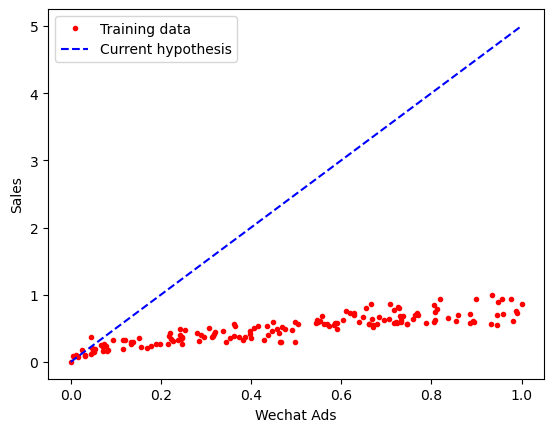

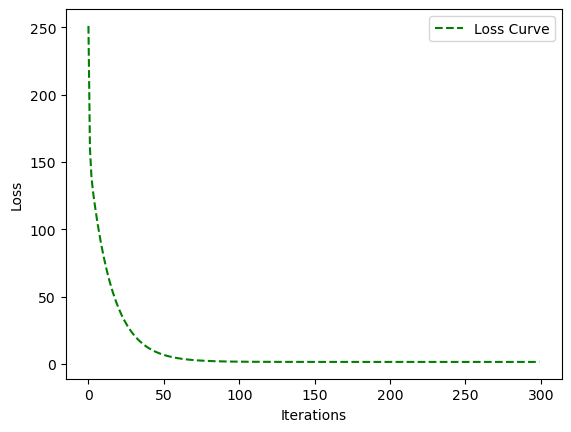

In [9]:
# 首先确定参数的初始值
iterations = 300;   # 迭代250次
alpha = 0.5;  # 学习速率
weight = 5
bias = 0
print('当前损失：', loss_function(X_train, y_train, weight, bias))

# 绘制当前的函数模型
plt.plot(X_train, y_train, 'r.', label='Training data')
line_X = np.linspace(X_train.min(), X_train.max(), 500)
line_y = [weight*xx + bias for xx in line_X]
plt.plot(line_X, line_y, 'b--', label='Current hypothesis') # 当前随机给定的w & b
plt.xlabel('Wechat Ads')
plt.ylabel('Sales')
plt.legend()
plt.show()

# 根据初始参数值，进行梯度下降，也就是开始训练机器，拟合函数
loss_history, weight_history, b_history = gradient_descent(X_train, y_train, weight, bias, alpha, iterations)
plt.plot(loss_history, 'g--', label='Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 调试学习速率

通过调整学习速率与迭代次数，观察最佳的速率（**使在尽量短的迭代中函数收敛**）



当前损失： 1.4900725768004377
当前权重： 0.6609702152587041
当前偏置： 0.1739598201295194


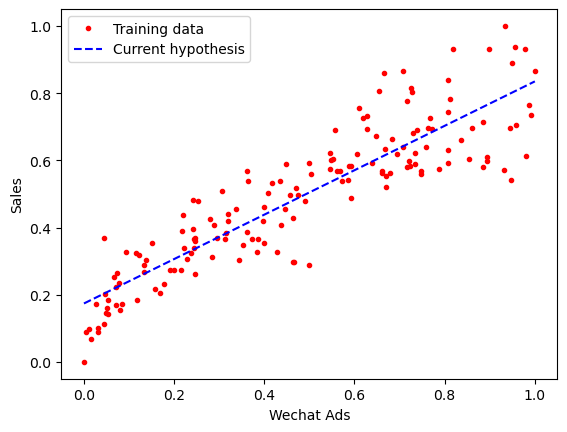

In [10]:
print('当前损失：', loss_function(X_train, y_train, weight_history[-1], b_history[-1]))
print('当前权重：', weight_history[-1])
print('当前偏置：', b_history[-1])

# 样本散点图
plt.plot(X_train, y_train, 'r.', label='Training data')
# 画当前算出的最佳拟合函数
line_X = np.linspace(X_train.min(), X_train.max(), 500)
line_y = [weight_history[-1]*xx + b_history[-1] for xx in line_X]
plt.plot(line_X, line_y, 'b--', label='Current hypothesis') # 当前随机给定的w & b
plt.xlabel('Wechat Ads')
plt.ylabel('Sales')
plt.legend()
plt.show()

最后，我们在测试集上测试损失值，发布比较优秀的。我们还可以把测试集的损失曲线打印出来，与训练集的损失曲线对比，这两者应该是比较吻合的。

因此我们可得：
最佳权重 w = 0.6609702152587041
最佳偏置 b = 0.1739598201295194

In [11]:
X_test = scaler.fit_transform(X_test)
y_test = scaler.fit_transform(y_test)
print('测试集损失：', loss_function(X_test, y_test, weight_history[-1], b_history[-1]))

测试集损失： 0.4211230972770833


## 轮毂图

损失曲线描绘的是损失和迭代次数之 间的关系，而轮廓图则描绘的是L、w和b这3者之间的关系。

在轮廓图中，每一个圈圈上的各个点，损失值都相同。也就是说，这些点所对应的w和b，带来的L是等值的。而L的最小值，就投影到了同心椭圆的中心点，也就是全局最优解，此时只有一个最优的w和b的组合。



# 多元线性回归模型


多元，即多变量，也就是特征是多维的。我们用下标（例如w1和 x1）代表特征的编号，即特征的维度。多个特征，可以用来表示更复杂的机器学习模型。

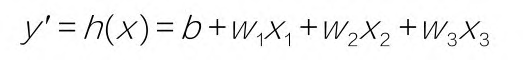

上面函数等阶：y'=h（x）=$w^T$·x + b

将之转化为向量的点积运算。

还可以把公式进一步简化，就是把b也看作权重w0，那么需要引入 x0，这样公式就是：

y'=h（x）=$w^T$·x 


上面的表述形式令多元回归的程序实现过程更为简洁。多元回归算法与一元是相似的。我们下面可以直接上代码：

In [12]:
import numpy as np
import pandas as pd

### -- 1.1 读数据源
df_ads = pd.read_csv('/kaggle/input/learn-ads-amount/advertising.csv')
print('数据源：')
df_ads.head()

### -- 1.2 数据清洗与规范化
X = np.array(df_ads)
X = np.delete(X, [3], axis=1) # 删除标签
y = np.array(df_ads.sales)
print ("张量X的阶:",X.ndim)
print ("张量X的形状:", X.shape)
print ('打印样本(前10)\n 微信、微博、其它\n', X[:10])

# 因为 x 已是矩阵了，所以特征不需要 reshape 了。但标签仍是向量，需要 reshape
y = y.reshape(-1, 1) # 通过reshape函数把向量转换为矩阵，-1就是len(y), 返回样本个数
print ("张量y的形状:", y.shape)
print ("标签 y:\n", y[:10])

### -- 1.3 数据集划分，训练集、验证集
# 将数据集进行80%（训练集）和20%（验证集）的分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### -- 1.4 归一化
from sklearn import preprocessing

scaler = MinMaxScaler(feature_range=[0,1]) #实例化
# 因为测试集与训练集用同一标准，所以只需要在训练集归一化时 fit 一次
X_train_origin = X_train.copy() # copy 是为了后面做预测时使用
y_train_origin = y_train.copy() # copy 是为了后面做预测时使用
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)
print ("\n\nX_train 归一化:\n", X_train[:10])

#### -- 1.5 多元的偏置参数统一对齐成权重
# 因为如上面所述，将多元回归的偏置参数 b 转成 w0*x0
x0_train = np.ones((len(X_train), 1))# 构造X_train长度的全1数组配合对Bias的点积
X_train = np.append(x0_train, X_train, axis=1) # 将x0添加到训练集X中
x0_test = np.ones((len(X_test), 1))
X_test = np.append(x0_test, X_test, axis=1) # 测试集同样操作
print ("\n\n拆分训练集以及多元偏置对齐后，张量X的形状:", X_train.shape)
print ('此时 X_train：\n[X0（偏置） 微信  微博  其它]\n', X_train[:10])

### -- 2. 假设函数与损失函数

# 手工定义一个 MSE 均方误差函数,W 此时是一个向量
def loss_function(X, y, W):
    y_hat = X.dot(W.T)
    loss = y_hat.reshape((len(y_hat), 1)) - y
    cost = np.sum(loss**2) / (2*len(X))
    return cost

# 定义梯度下降函数
def gradient_descent(X, y, W, alpha, iterations):
    l_history = np.zeros(iterations)
    W_history = np.zeros((iterations, len(W)))
    for iter in range(iterations):
        y_hat = X.dot(W)
        loss = y_hat.reshape((len(y_hat), 1)) - y   # 中间过程, y_hat和y真值的差
        derivative_W = X.T.dot(loss) / (2*len(X))   # 求出多项式的梯度向量
        derivative_W = derivative_W.reshape(len(W))
        W = W- alpha * derivative_W.reshape(len(W))
        l_history[iter] = loss_function(X, y, W)
        W_history[iter] = W
    return l_history, W_history

### -- 3. 构建一个线性回归函数模型

# 首先确定参数的初始值
iterations = 300
alpha = 0.5
weight = np.array([0.5, 1, 1, 1])
print('\n\n将初始权重代入损失函数，对于权重(0.5, 1, 1, 1)当前损失：', loss_function(X_train, y_train, weight))

# 定义线性回归模型
def linear_regression(X, y, weight, alpha, iterations):
    loss_history, weight_history = gradient_descent(X, y, weight, alpha, iterations)
    y_pred = X.dot(weight_history[-1])
    training_acc = 100 - np.mean(np.abs(y_pred-y))*100  # 计算准确率
    print("线性回归训练准确率：{:.2f}%".format(training_acc))
    return loss_history, weight_history

# 调用刚才定义的线性回归模型
print('\n\n')
loss_history, weight_history = linear_regression(X_train, y_train, weight, alpha, iterations)
print("最终所得权重：", weight_history[-1])
print("最终所得损失值：", loss_history[-1])
finalWeight = weight_history[-1]
print('\n\n')


## -- 4. 预测
# 因为我们得到的函数是归一化的，所以预测时要先用归一化计算，然后再反归一化
# h(x) = W^T·X
X_plan = [250, 50, 50]
print('预测值 X_plan: ', X_plan)
X_plan = np.array(X_plan).reshape(-1, 3)
temp = scaler.fit_transform(X_train_origin) # 归一化
X_plan = scaler.transform(X_plan)
X_plan = np.append([1], X_plan)
print('清洗与规范化后，预测值归一化，X_plan: ', X_plan)
# X_plan = scaler.inverse_transform(X_plan)
y_plan = np.dot(finalWeight, X_plan)  # 归一化后的预测集与权值点积，得出归一化标签
# 归一化标签反归一化，得最终预测销售额
temp = scaler.fit_transform(y_train_origin)
y_value = scaler.inverse_transform(np.array(y_plan).reshape(-1,1))
print("假设投入为[250, 50, 50]，预测商品的销售额：", y_value[0][0], "千元。")

数据源：
张量X的阶: 2
张量X的形状: (200, 3)
打印样本(前10)
 微信、微博、其它
 [[ 304.4   93.6  294.4]
 [1011.9   34.4  398.4]
 [1091.1   32.8  295.2]
 [  85.5  173.6  403.2]
 [1047.   302.4  553.6]
 [ 940.9   41.6  155.2]
 [1277.2  111.2  296. ]
 [  38.2  217.6   16.8]
 [ 342.6  162.4  260. ]
 [ 347.6    6.4  118.4]]
张量y的形状: (200, 1)
标签 y:
 [[ 9.7]
 [16.7]
 [17.3]
 [ 7. ]
 [22.1]
 [17.2]
 [16.1]
 [ 5.7]
 [11.3]
 [ 9.4]]


X_train 归一化:
 [[0.39995488 0.1643002  0.42568162]
 [0.72629521 0.83975659 0.34564644]
 [0.22746071 0.31845842 0.35620053]
 [0.66952402 0.05679513 0.30167106]
 [0.81803143 0.98782961 0.38698329]
 [0.35341003 0.27789047 0.09322779]
 [0.24355215 0.40567951 0.28320141]
 [0.44852996 0.83975659 0.40105541]
 [0.44544703 0.09330629 0.07915567]
 [0.71636965 0.86612576 0.294635  ]]


拆分训练集以及多元偏置对齐后，张量X的形状: (160, 4)
此时 X_train：
[X0（偏置） 微信  微博  其它]
 [[1.         0.39995488 0.1643002  0.42568162]
 [1.         0.72629521 0.83975659 0.34564644]
 [1.         0.22746071 0.31845842 0.35620053]
 [1.         0.66